<a href="https://colab.research.google.com/github/oyyarko/deeplearning_cnn/blob/master/traffic_sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%cd /content/drive/My Drive/Classification/Traffic/

/content/drive/My Drive/Classification/Traffic


In [0]:
!pip install gdown

In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 25kB/s 
     |████████████████████████████████| 450kB 22.1MB/s 
     |████████████████████████████████| 3.9MB 20.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=64f5737b354bd7ca53d8f922d439c6497666af2fb1559d352e35e648b11becd6
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Fo

In [0]:
!gdown --id 1BGDHe6qQwrBEgnl-tXTSKo6TvDj8U3wS --output traffic-sign.zip

Downloading...
From: https://drive.google.com/uc?id=1BGDHe6qQwrBEgnl-tXTSKo6TvDj8U3wS
To: /content/drive/My Drive/Classification/traffic-sign.zip
2.70MB [00:00, 85.3MB/s]


In [0]:
!unzip traffic-sign.zip

Archive:  traffic-sign.zip
  inflating: Traffic sign classification/gui.py  
  inflating: Traffic sign classification/traffic_sign.py  
  inflating: Traffic sign classification/traffic_classifier.h5  


In [0]:
!curl 'https://storage.googleapis.com/kaggle-data-sets/82373/191501/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1587713824&Signature=RGp9Lc%2FFczClCeAr14NNZrC06xU%2BsqITxOS6heumk57796OW63t2clrO81TMwCtXFoCeqIwUJGaX7NFdjT2CDmdzzzdXQbgCS4LqMnyfkWdRD607W0%2Fcr2rf9uDblIet6eBAh8F0IO0U8p1xgbFSUxr8Tz6lTzrRjp%2F0F%2FrAZ6D9iBGTMOznkGqpnFdk7dw7Cb6vihH74QLtKogvD9AIpynGEyvXyDIcAy0lU4oPiUR0%2BfXpKaBtNrkmTqhop5%2FVEX%2BvcxEvhhSMmAK5rcWM5b2Xj1W0%2F%2FLWiqALOisHGoPuJ29kGJH3v0suCgMxkMPsgCd64IUD8E9pfNOmLlPj9A%3D%3D&response-content-disposition=attachment%3B+filename%3Dgtsrb-german-traffic-sign.zip' -H 'User-Agent: Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:75.0) Gecko/20100101 Firefox/75.0' -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' -H 'Accept-Language: en-US,en;q=0.5' --compressed -o traffic-sign.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  611M  100  611M    0     0  39.4M      0  0:00:15  0:00:15 --:--:-- 36.1M


In [0]:
!unzip traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  inflating: train/5/00005_00054_00001.png  
  in

#**Import Libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image
from tqdm import tqdm
os.chdir('/content/drive/My Drive/Classification/Traffic')

In [24]:
data = []
labels = []
classes = 43
cur_path = os.getcwd() # /content/drive/My Drive/Classification/Traffic
print(cur_path)
#create an iterator that will iterate over classes
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in tqdm(images):
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

 26%|██▌       | 55/210 [00:00<00:00, 545.39it/s]

/content/drive/My Drive/Classification/Traffic


100%|██████████| 240/240 [00:00<00:00, 516.83it/s]


In [25]:
data[0:20]

array([[[[ 75,  78,  80],
         [ 74,  76,  78],
         [ 85,  86,  84],
         ...,
         [ 68,  75,  74],
         [ 65,  69,  68],
         [ 66,  67,  66]],

        [[ 83,  84,  86],
         [ 80,  80,  82],
         [ 88,  88,  83],
         ...,
         [ 73,  77,  78],
         [ 76,  78,  75],
         [ 80,  80,  78]],

        [[ 78,  78,  80],
         [ 86,  85,  86],
         [ 90,  89,  90],
         ...,
         [ 71,  74,  71],
         [ 73,  74,  69],
         [ 78,  78,  74]],

        ...,

        [[133, 134, 139],
         [123, 127, 132],
         [112, 121, 125],
         ...,
         [ 94,  95,  89],
         [ 97,  98,  91],
         [ 99, 103,  99]],

        [[ 91,  95,  99],
         [ 91,  98, 103],
         [ 75,  86,  90],
         ...,
         [104, 102,  96],
         [110, 113, 104],
         [ 96, 104,  98]],

        [[ 85,  84,  87],
         [ 95, 101, 107],
         [ 63,  76,  81],
         ...,
         [103, 103,  95],
        

In [30]:
labels[36550:36920]

array([38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38

In [31]:
data.shape

(39209, 30, 30, 3)

#**Split data into traing and test**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367, 43) (7842, 43)


#**Build a CNN Model**

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 64)         

#**Train & Validate the model**

In [47]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
491/491 [==============================] - 6s 11ms/step - loss: 1.9362 - accuracy: 0.5268 - val_loss: 0.3320 - val_accuracy: 0.9189
Epoch 2/15
491/491 [==============================] - 5s 11ms/step - loss: 0.4980 - accuracy: 0.8641 - val_loss: 0.1042 - val_accuracy: 0.9764
Epoch 3/15
491/491 [==============================] - 5s 11ms/step - loss: 0.2878 - accuracy: 0.9203 - val_loss: 0.0787 - val_accuracy: 0.9834
Epoch 4/15
491/491 [==============================] - 5s 11ms/step - loss: 0.2456 - accuracy: 0.9327 - val_loss: 0.0606 - val_accuracy: 0.9852
Epoch 5/15
491/491 [==============================] - 5s 11ms/step - loss: 0.1872 - accuracy: 0.9482 - val_loss: 0.0506 - val_accuracy: 0.9884
Epoch 6/15
491/491 [==============================] - 5s 11ms/step - loss: 0.2025 - accuracy: 0.9470 - val_loss: 0.0402 - val_accuracy: 0.9893
Epoch 7/15
491/491 [==============================] - 5s 11ms/step - loss: 0.1565 - accuracy: 0.9583 - val_loss: 0.0500 - val_accuracy: 0.9858

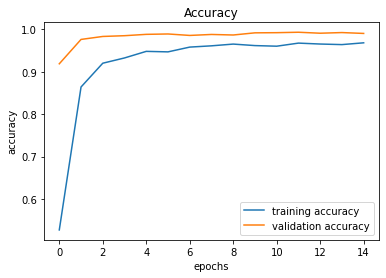

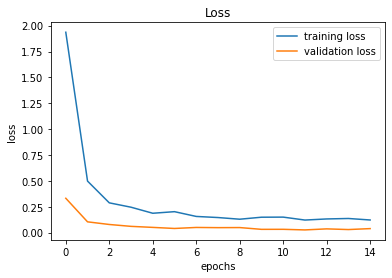

In [49]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

#**Test our model with test dataset**

In [51]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.9619160728424386


In [0]:
model.save('traffic_sign_classifier.h5')

#**Traffic Sign Classifier GUI**

In [0]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk
from tensorflow.keras.models import load_model

In [0]:
model = load_model('traffic_sign_classifier.h5')

In [0]:
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }